<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/Intro_ImageFourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

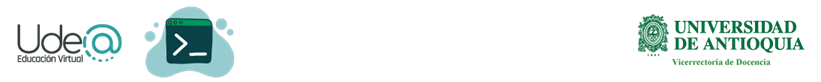

# Image Fourier Transform

**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2022-1**



### Image Fourier Transform with cv2
We first load an image and pick up one color channel, on which we apply Fourier Transform. The transform is done simply with cv2.dft() function. Here, “dft” means “discrete fourier transform”, since an image is a collection discrete values, not continuous ones.

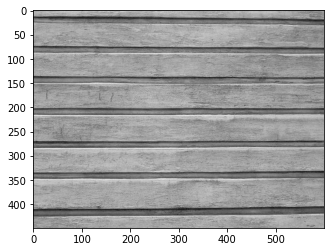

time: 1.21 s (started: 2022-02-09 13:54:13 +00:00)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

#url = 'https://deadhomersociety.files.wordpress.com/2011/04/lisasfirstword6.png' # foto homero
url = 'https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/CHESScom/phpUnsLhe.png' # chessboar
url  = 'https://b.rgbimg.com/users/m/mz/mzacha/600/n5sqEv0.jpg'
img = io.imread(url) # load an image
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[:,:,1] # Green channel
plt.imshow(img,cmap='gray')


The output of cv2.dft() function is a 3-dimensional numpy array of shape (384, 512, 2). Since, in mathematics, the output of 2-D Fourier Transform is a 2-dimensional complex array, the first and second channel of f are the real part and imaginary part respectively. f_complex is, thus, the complex version of f.
In the following few lines, we convert the complex numpy array f_complex to the one which can be shown as an image.
At the 5th line, we take the logarithm of the absolute value of f_complex, because f_abs has tremendously wide range. The last 3 lines make sure that all elements of f_img lie between 0 and 255.
Do not forget to add 1 to f_abs, since the argument to the logarithm function should be greater than or equal to 1.0. Also note that the data type of f_img is 8-bit unsigned-int, because we want to display it as an image.

In [ ]:
!pip install ipython-autotime
 
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2022-02-09 13:51:37 +00:00)


In [ ]:
f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# Nos entrega la FFT de una imagen con un arreglo nRow*nCol*2, donde cada dimensión hace referencia a
# f[:,:,0] : parte real del espectro 
# f[:,:,1] : parte imaginaria del espectro

time: 57.6 ms (started: 2022-02-09 13:54:20 +00:00)


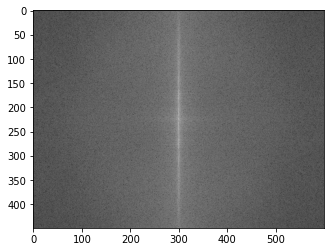

time: 254 ms (started: 2022-02-09 13:54:21 +00:00)


In [ ]:
# Siempre es importante desplazar el espectro para tener las cero frecuencias en el centro de la imagn
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
# Then we normilize the spectrum to correctly visualize the frecuency image
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.imshow(f_img, cmap='gray')

Brighter pixels correspond to larger values. Thus, this result means that the original image contained lower frequency components more than higher frequency components. See the previous post for more detail about how to interpret the result.

## Image Fourier Transform with NumPy
You can also use numpy’s np.fft.fft2() function instead of cv2. However it is little bit slower than cv2.dft().

In [ ]:
f = np.fft.fft2(img)

time: 11.9 ms (started: 2022-02-09 13:45:35 +00:00)


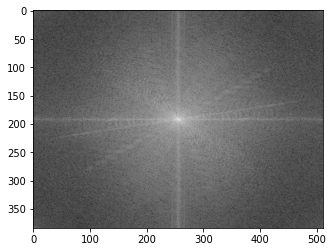

time: 247 ms (started: 2022-02-09 13:45:50 +00:00)


In [ ]:
f_shift = np.fft.fftshift(f)
f_complex = f_shift

f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.imshow(f_img, cmap='gray')

Since the he returned value of np.fft.fft2() is already a complex numpy array, you don’t need to convert it explicitly.
The result is the save as above.
## Benchmarks
I did this benchmark test to see which transform function is faster. The result shows that cv2.fft() is always faster than np.fft.fft2() regardless of the array size. The difference of their performance gets exponentially larger as the array size increases.

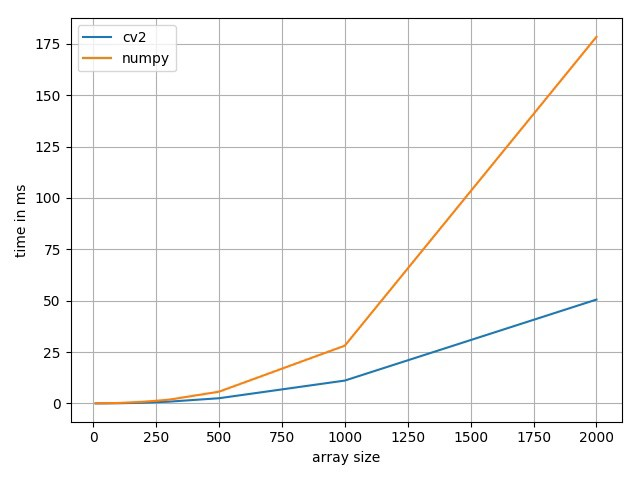

## Conclusion
Both transform function is quite easy to use. However if we want to use Fourier Transform in real time speed, we should use cv2.fft() function rather than np.fft.fft2().